# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

In [1]:
# Import Library
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import datetime



Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
# Load Dataset
dataset_path = "../waterquality.csv"
df = pd.read_csv(dataset_path)

In [3]:
# Lihat 5 baris pertama
df.head()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [4]:
# Ukuran dataset
print("Shape dataset:", df.shape)

Shape dataset: (7999, 21)


In [5]:
# Statistik Dasar
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7999 non-null   float64
 1   ammonia      7999 non-null   object 
 2   arsenic      7999 non-null   float64
 3   barium       7999 non-null   float64
 4   cadmium      7999 non-null   float64
 5   chloramine   7999 non-null   float64
 6   chromium     7999 non-null   float64
 7   copper       7999 non-null   float64
 8   flouride     7999 non-null   float64
 9   bacteria     7999 non-null   float64
 10  viruses      7999 non-null   float64
 11  lead         7999 non-null   float64
 12  nitrates     7999 non-null   float64
 13  nitrites     7999 non-null   float64
 14  mercury      7999 non-null   float64
 15  perchlorate  7999 non-null   float64
 16  radium       7999 non-null   float64
 17  selenium     7999 non-null   float64
 18  silver       7999 non-null   float64
 19  uraniu

In [6]:
# Statistik Deskriptif
df.describe()

,aluminium,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,viruses,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium
count,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000
mean,0.666158,0.161445,1.567715,0.042806,2.176831,0.247226,0.805857,0.771565,0.319665,0.328583,0.099450,9.818822,1.329961,0.005194,16.460299,2.920548,0.049685,0.147781,0.044673
std,1.265145,0.252590,1.216091,0.036049,2.567027,0.270640,0.653539,0.435373,0.329485,0.378096,0.058172,5.541331,0.573219,0.002967,17.687474,2.323009,0.028770,0.143551,0.026904
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.040000,0.030000,0.560000,0.008000,0.100000,0.050000,0.090000,0.405000,0.000000,0.002000,0.048000,5.000000,1.000000,0.003000,2.170000,0.820000,0.020000,0.040000,0.020000
50%,0.070000,0.050000,1.190000,0.040000,0.530000,0.090000,0.750000,0.770000,0.220000,0.008000,0.102000,9.930000,1.420000,0.005000,7.740000,2.410000,0.050000,0.080000,0.050000
75%,0.280000,0.100000,2.480000,0.070000,4.240000,0.440000,1.390000,1.160000,0.610000,0.700000,0.151000,14.610000,1.760000,0.008000,29.480000,4.670000,0.070000,0.240000,0.070000
max,5.050000,1.050000,4.940000,0.130000,8.680000,0.900000,2.000000,1.500000,1.000000,1.000000,0.200000,19.830000,2.930000,0.010000,60.010000,7.990000,0.100000,0.500000,0.090000


In [7]:
#Cek Missing Value
df.isnull().sum()

aluminium      0
ammonia        0
arsenic        0
barium         0
cadmium        0
chloramine     0
chromium       0
copper         0
flouride       0
bacteria       0
viruses        0
lead           0
nitrates       0
nitrites       0
mercury        0
perchlorate    0
radium         0
selenium       0
silver         0
uranium        0
is_safe        0
dtype: int64

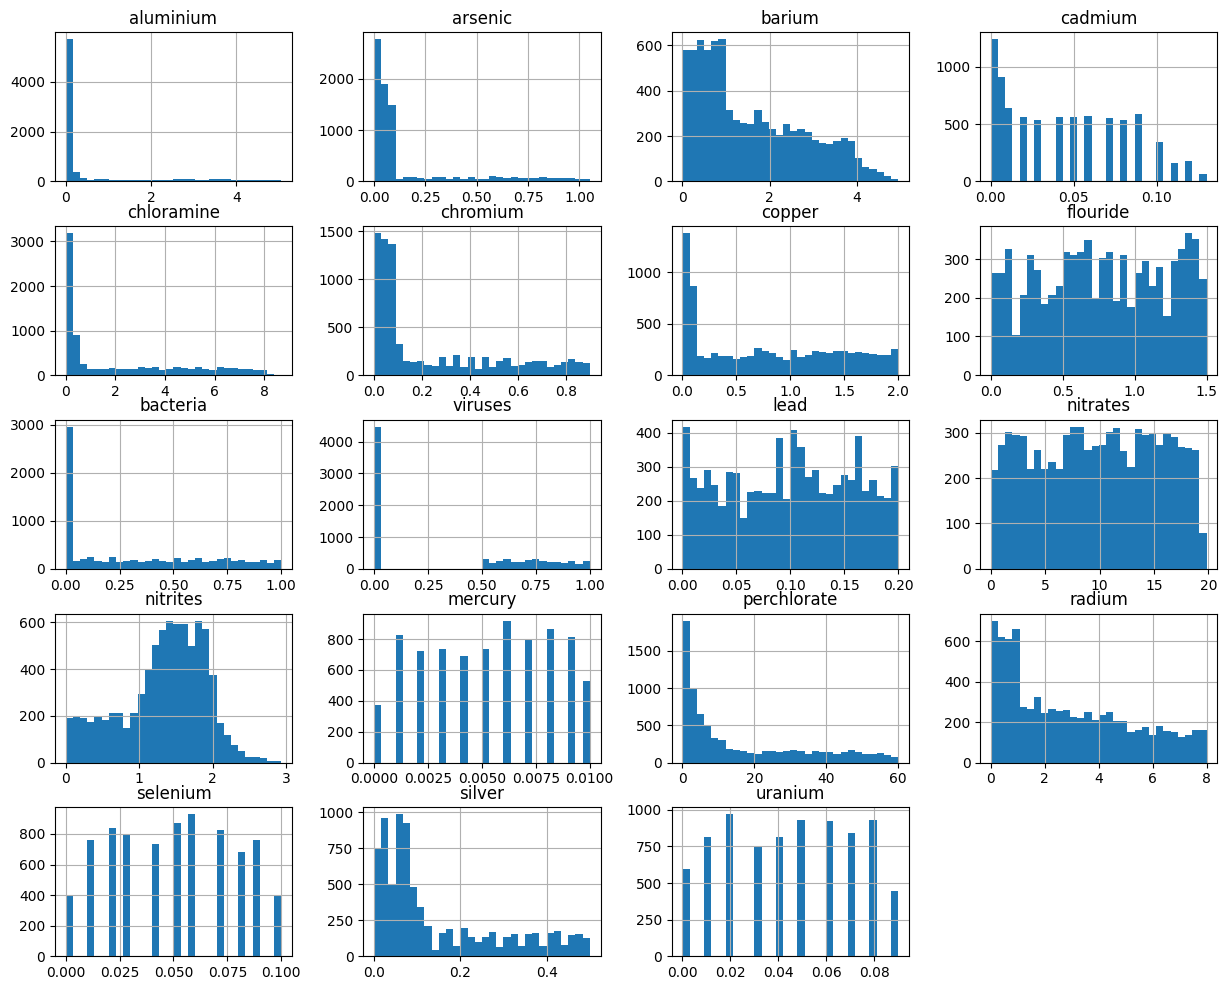

In [8]:
# Distribusi beberapa fitur contoh
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
df[numerical_cols].hist(bins=30, figsize=(15,12))
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [9]:
# Convert to Numeric
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors="coerce")
print("Non-numeric values converted to NaN.")

Non-numeric values converted to NaN.


In [10]:
# Hapus duplikat
before = len(df)
df = df.drop_duplicates()
after = len(df)
print(f"Duplicates removed: {before - after}")

Duplicates removed: 0


In [11]:
# Handle Missing Values
num_cols = df.columns.drop("is_safe")
df[num_cols] = df[num_cols].apply(lambda x: x.fillna(x.median()))
print("Missing values filled with median.")

Missing values filled with median.


In [12]:
# Handle Outliers (IQR Capping)
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = np.clip(df[col], lower, upper)
print("Outliers handled using IQR capping.")

Outliers handled using IQR capping.


In [13]:
# Standardization
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])
print("Features standardized using StandardScaler.")

Features standardized using StandardScaler.


In [14]:
# Binning pH
if "ph" in df.columns:
    df["ph_bin"] = pd.qcut(df["ph"], q=3, labels=["Low", "Medium", "High"])
    print("pH feature binned.")

In [15]:
# Pisahkan Fitur dan Target
X = df.drop(columns=["is_safe"])
y = df["is_safe"]
print("Fitur shape:", X.shape)
print("Target shape:", y.shape)

Fitur shape: (7999, 20)
Target shape: (7999,)


In [16]:
# Final Check
df_final = df.copy()

print("Shape final:", df_final.shape)
df_final.head()

Shape final: (7999, 21)


,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.808417,-0.585595,-0.544387,1.054498,-0.993313,-0.711697,2.153450,-0.973005,-1.657455,-0.363210,...,-0.781349,1.129976,-0.348860,0.608826,1.203735,1.661506,1.053772,1.339112,-0.917139,1.0
1,1.808417,0.775270,-0.967091,1.432783,-1.132020,1.208933,1.599174,-0.223194,0.295018,1.002641,...,0.009461,-1.409284,1.046895,-0.739364,0.893326,0.124610,1.053772,0.851451,0.198010,1.0
2,1.808417,-0.029082,-0.544387,-0.812255,-0.965571,0.803769,1.044899,-1.202539,0.501751,-0.818494,...,-0.368752,0.783467,-0.383754,0.271779,1.912190,1.786352,0.706165,2.035772,-1.288855,0.0
3,1.808417,-0.332123,-0.544387,1.144957,-1.159762,1.968614,-0.802687,1.307032,0.708483,1.184755,...,-1.434626,-1.517568,-0.069709,-0.402317,-0.415026,-0.516840,-1.031870,2.105438,0.198010,1.0
4,1.808417,1.132384,-0.685289,-1.124751,-1.021054,0.192129,1.636126,-0.360915,-0.371120,-0.575676,...,0.301717,-0.555645,-0.383754,-0.739364,0.024861,-0.219792,-1.031870,-0.611535,-0.917139,1.0


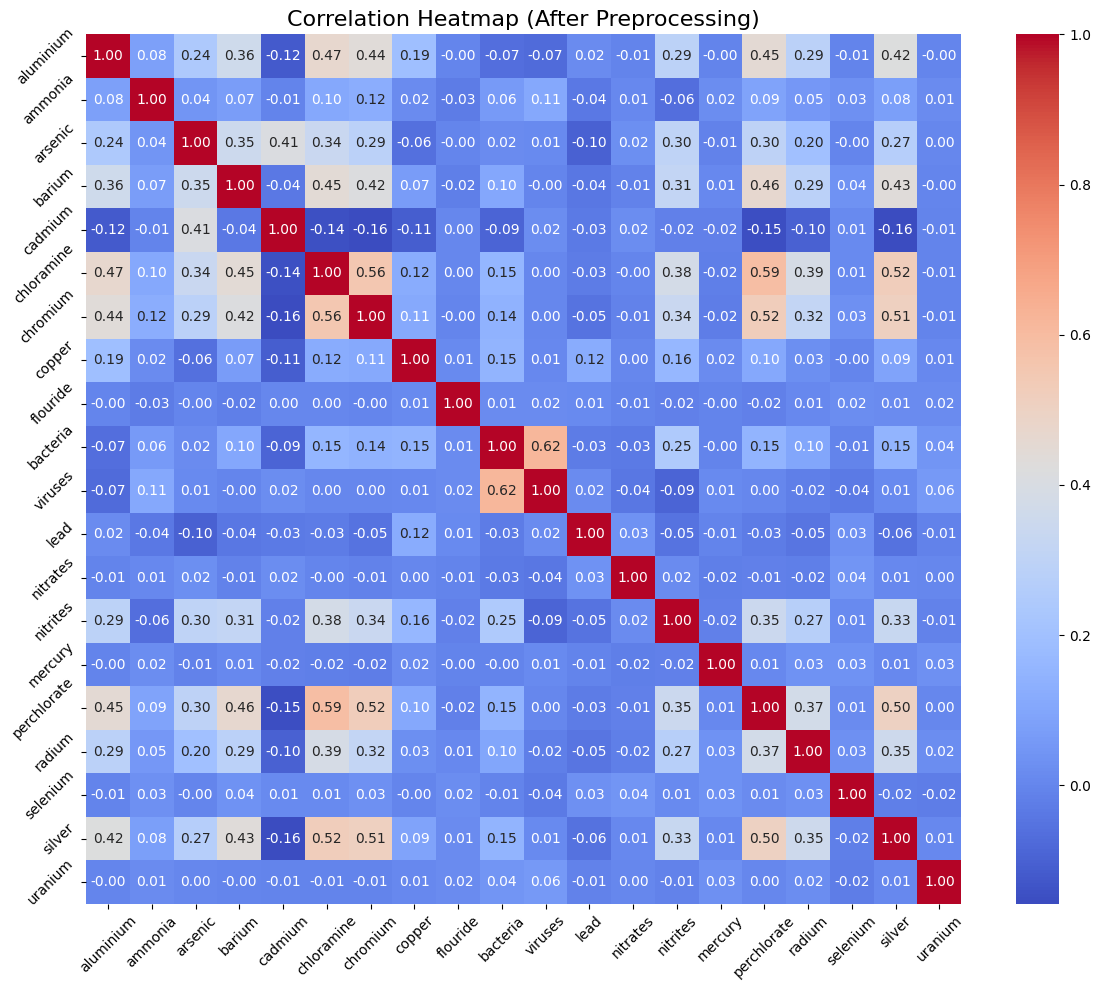

In [17]:
# Visualisasi Korelasi
feature_cols = X.columns  

plt.figure(figsize=(12, 10))
sns.heatmap(
    X[feature_cols].corr(), 
    annot=True,            
    fmt=".2f",               
    cmap="coolwarm",
    cbar=True
)
plt.title("Correlation Heatmap (After Preprocessing)", fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()

In [18]:
# Save Preprocessed Dataset
output_dir = "waterquality_preprocessed"
os.makedirs(output_dir, exist_ok=True)
timestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")
output_file = os.path.join(output_dir, f"waterquality_experimen_preprocessed_{timestamp}.csv")
df.to_csv(output_file, index=False)
print(f"Preprocessed dataset saved as '{output_file}'")

Preprocessed dataset saved as 'waterquality_preprocessed\waterquality_experimen_preprocessed_20251221_125904.csv'
